序列1氨基酸百分比组成: [6.2857, 5.4286, 5.5714, 4.7143, 4.8571, 5.0, 5.1429, 5.2857, 5.7143, 4.8571, 5.0, 5.2857, 4.5714, 5.4286, 4.1429, 4.0, 4.5714, 4.8571, 4.4286, 4.8571]
序列2氨基酸百分比组成:: [4.5714, 5.2857, 4.5714, 5.4286, 4.5714, 4.8571, 6.1429, 6.2857, 4.7143, 4.2857, 5.7143, 4.5714, 4.7143, 4.8571, 3.5714, 3.7143, 5.7143, 4.5714, 6.2857, 5.5714]
K-S统计量: 0.2
P值: 0.8319696107963263


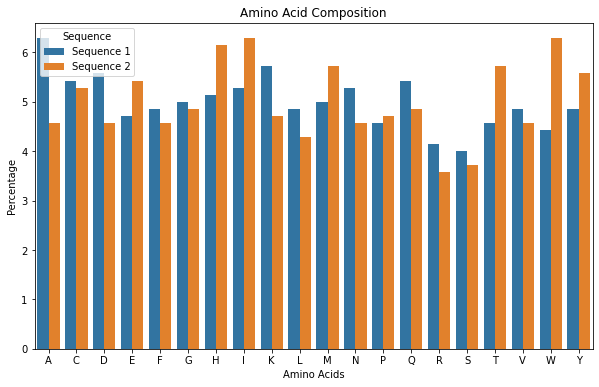

In [5]:
import random
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 定义氨基酸字母表和其对应的百分比组成
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
amino_acid_percentages = [8.1, 5.6, 5.4, 6.0, 7.6, 2.4, 4.3, 5.2, 2.2, 2.3, 6.5, 4.7, 5.9, 3.9, 5.0, 6.7, 5.6, 1.6, 3.0, 5.2]

# 生成随机的氨基酸序列
def generate_random_sequence(length):
    sequence = ''.join(random.choices(amino_acids, k=length))
    return sequence

# 生成两条氨基酸序列
sequence1 = generate_random_sequence(700)
sequence2 = generate_random_sequence(700)

# 计算氨基酸百分比组成
sequence1_percentages = [round(sequence1.count(aa) / len(sequence1) * 100, 4) for aa in amino_acids]
sequence2_percentages = [round(sequence2.count(aa) / len(sequence2) * 100, 4) for aa in amino_acids]

# 执行K-S检验
ks_statistic, p_value = stats.ks_2samp(sequence1_percentages, sequence2_percentages)

# 输出结果
print("序列1氨基酸百分比组成:", sequence1_percentages)
print("序列2氨基酸百分比组成::", sequence2_percentages)
print("K-S统计量:", ks_statistic)
print("P值:", p_value)

# 创建DataFrame存储氨基酸和百分比数据
data = {'Amino Acid': amino_acids, 'Sequence 1': sequence1_percentages, 'Sequence 2': sequence2_percentages}
df = pd.DataFrame(data)

# 设置图的大小
plt.figure(figsize=(10, 6))

# 使用Seaborn绘制柱状图
df = pd.melt(df, id_vars='Amino Acid', var_name='Sequence', value_name='Percentage')
sns.barplot(x='Amino Acid', y='Percentage', hue='Sequence', data=df)

# 设置图表标题和坐标轴标签
plt.title("Amino Acid Composition")
plt.xlabel("Amino Acids")
plt.ylabel("Percentage")

# 显示图表
plt.show()
